In [1]:
import pandas as pd

In [2]:
naver_df = pd.read_csv("../data/NEWS/naver/naver_KBS_comments_2022.csv")

In [3]:
naver_df.reset_index(drop = True, inplace = True)

In [4]:
youtube_df = pd.read_pickle("../data/NEWS/KBS/KBS_0101_0831.pkl")

In [5]:
naver_df.groupby('vtitle').size()

vtitle
104일 만의 검찰총장 지명…‘친윤·안정’ 택했다             1
10년 끈 ‘론스타·대한민국 분쟁’ 밤사이 결론              1
119특별구급대가 병원 간 이송까지…“환자 이송 지체 불 보듯”     2
120명에게 14억 원 가로챈 ‘보이스피싱 총책’ 강제송환        5
130년 만에 빛 본 고종 저고리…‘한복’ 위상 미국서 알린다     15
                                       ..
흐릿한 번호판 잡는 ‘매의 눈’…AI시스템 경찰 현장에          2
흑해 곡물 반출 합의 유지…우크라 “이르면 주중 수출”          3
흑해 곡물 수출 타결, 식량난 다소 ‘숨통’… 변수 남아         1
흥행 돌풍 ‘한산’, 거북선·학익진 고증은?               29
희망버스 비정규직 노조 지지…1독 작업 재개                1
Length: 1534, dtype: int64

In [22]:
import re
def title_match(query):
    query = query.replace("&quot;", "")
    query = re.sub(' */ KBS.*', '',query)
    query = re.sub('.{3}[0-9]{4}년.*', '',query)
    query = re.sub('/[0-9]{1}.*/KBS', '',query)
    return query

In [23]:
youtube_df['video_title'] = youtube_df['video_title'].apply(lambda x : title_match(x))

In [71]:
naver_vid = naver_df[['vid', 'vtitle', 'category']].drop_duplicates()

In [72]:
youtube_vid = youtube_df[['video_id']].drop_duplicates()

In [73]:
youtube_vid.reset_index(drop = True, inplace= True)
naver_vid.reset_index(drop = True, inplace= True)

In [75]:
from unicodedata import category


vid_dict = {}
category_dict = {}


for i, j, k in naver_vid.values:
    vid_dict[i] = j
    category_dict[i] = k


In [76]:
both_titles = set(youtube_vid['video_id']) & set(naver_vid['vid'])

In [77]:
len(both_titles)

1863

In [29]:
youtube_df.head(2)

,video_id,time,channel_id,video_title,video_description,channel_title,view,like,commentcnt,cap,...,comment_id,re_reply,comment_time,author,c_like,ori_rep,captiontext,ori_rep_list,year,ymd
0,5imqfqo6jtI,2022-01-01T21:22:43Z,UCcQTRi69dsVYHN3exePtZ1A,오미크론 한달 만에 1천 명대…숨은 감염 확산하며 다음달 안에 우세종 / KBS ...,[앵커]\n\n 새해부터 오미크론 변이 확산세가 심상치 않습니다.\n\n 국내에서...,KBS News,3629,14,12,cap,...,UgzuhgNgfT6l29nDgwF4AaABAg,0.0,2022-01-03T10:08:48Z,김 영,1.0,Parent,새해부터 오미크론 변이 확산세가 심상치않습니다.국내에서 처음 오미크론 사례가 확인된...,NaN,2022,2022-01-01
1,45kVesI8mLw,2022-01-01T03:26:19Z,UCcQTRi69dsVYHN3exePtZ1A,"WHO 사무총장, '올해 코로나 종식 낙관론' 피력 / KBS 2022.01.01.",세계보건기구 WHO 사무총장이 올해 말 코로나19가 종식될 수 있다는 낙관적 입장...,KBS News,31788,251,268,cap,...,Ugw6ihJVxQorenSMq_Z4AaABAg,0.0,2022-01-01T03:39:51Z,chavandposh,3.0,Parent,세계보건기구 WHO 사무총장이 올해 말코로나19가 종식될 수 있다는 낙관적 입장을밝...,NaN,2022,2022-01-01


In [30]:
you_use = youtube_df[
    ['video_id', 'time', 'video_title', 'view', 'like', 'commentcnt', 
    'comment', 'comment_id', 're_reply', 'comment_time', 'author', 'c_like', 'ori_rep']
]

In [31]:
you_use.columns = ['vid', 'vtime', 'vtitle', 'view', 'vlike', 'ccnt', 'comment', 'cid', 'reply', 'ctime', 'author', 'clike', 'parent']

In [32]:
naver_df.head(2)

,Unnamed: 0,author,comment,ctime,like,reply,parent,vtitle,vtime,category,vid
0,0,fndk****,deleted,2022.01.02. 11:34,-1,-1,-1,오미크론 한달 만에 1천 명대…숨은 감염 확산하며 다음달 안에 우세종,2022.01.02. 오전 6:05,사회,5imqfqo6jtI
1,1,오미크론은 감기수준인ㄷ 문재인은 대선 투표조작을 위해 오미크론을 핑계로 사전투표를 ...,jsw8****,2022.01.03. 09:42,0,0,parent,오미크론 한달 만에 1천 명대…숨은 감염 확산하며 다음달 안에 우세종,2022.01.02. 오전 6:05,사회,5imqfqo6jtI


In [33]:
nav_use = naver_df[
    ['vid', 'vtime', 'vtitle', 'comment', 'reply', 'ctime', 'author', 'like', 'parent', 'category']
]

In [34]:
nav_use.columns = ['vid', 'vtime', 'vtitle', 'comment', 'reply', 'ctime', 'author', 'clike', 'parent', 'category']

In [35]:
def both_video_filter(x, both_titles):
    if x['vid'] in both_titles:
        return True
    else:
        return False

In [36]:
both_titles = list(both_titles)

In [37]:
temp = []

for i in range(nav_use.shape[0]):
    if both_video_filter(nav_use.iloc[i], both_titles):
        temp.append(nav_use.iloc[i].copy())

naver_filtered = pd.DataFrame(temp)

In [38]:
temp = []

for i in range(you_use.shape[0]):
    if both_video_filter(you_use.iloc[i], both_titles):
        temp.append(you_use.iloc[i].copy())

youtube_filtered = pd.DataFrame(temp)

In [39]:
print(naver_filtered.shape)
print(youtube_filtered.shape)

(14031, 10)
(370317, 13)


In [40]:
youtube_filtered.head(2)

,vid,vtime,vtitle,view,vlike,ccnt,comment,cid,reply,ctime,author,clike,parent
0,5imqfqo6jtI,2022-01-01T21:22:43Z,오미크론 한달 만에 1천 명대…숨은 감염 확산하며 다음달 안에 우세종 / KBS ...,3629,14,12,결론은 뭔지아세요..? 코로나저거 걸려도 증상도 별로 없어서 내가 걸렸는지도 모르고...,UgzuhgNgfT6l29nDgwF4AaABAg,0.0,2022-01-03T10:08:48Z,김 영,1.0,Parent
1,45kVesI8mLw,2022-01-01T03:26:19Z,"WHO 사무총장, '올해 코로나 종식 낙관론' 피력 / KBS 2022.01.01.",31788,251,268,안믿어 안믿어.,Ugw6ihJVxQorenSMq_Z4AaABAg,0.0,2022-01-01T03:39:51Z,chavandposh,3.0,Parent


In [41]:
naver_filtered.head(2)

,vid,vtime,vtitle,comment,reply,ctime,author,clike,parent,category
0,5imqfqo6jtI,2022.01.02. 오전 6:05,오미크론 한달 만에 1천 명대…숨은 감염 확산하며 다음달 안에 우세종,deleted,-1,2022.01.02. 11:34,fndk****,-1,-1,사회
1,5imqfqo6jtI,2022.01.02. 오전 6:05,오미크론 한달 만에 1천 명대…숨은 감염 확산하며 다음달 안에 우세종,jsw8****,0,2022.01.03. 09:42,오미크론은 감기수준인ㄷ 문재인은 대선 투표조작을 위해 오미크론을 핑계로 사전투표를 ...,0,parent,사회


In [82]:
comment_cnt = pd.merge(
    left = pd.DataFrame(youtube_filtered.groupby('vid').size()),
    right = pd.DataFrame(naver_filtered.groupby('vid').size()),
    how = 'inner',
    on = 'vid')

comment_cnt.columns = ['youtube','naver']

In [83]:
comment_cnt

,youtube,naver
vid,,
-2KbmcbYaZg,2,1
-9w1W5DiNt0,20,5
-Ak_rXYhAoA,2,12
-C_TMXKuJq0,14,7
-DIiXJV80zo,1,16
...,...,...
znrGagwWfu0,28,5
zpe7BgZPirk,1365,65
zqMimKl5nv8,14,3


In [84]:
from sklearn.preprocessing import StandardScaler
import numpy as np

stdScaler = StandardScaler()
z_score = stdScaler.fit_transform(np.array(comment_cnt[['youtube', 'naver']]))

/home/mglee/anaconda3/envs/save/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mglee/anaconda3/envs/save/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1', ylabel='Density'>

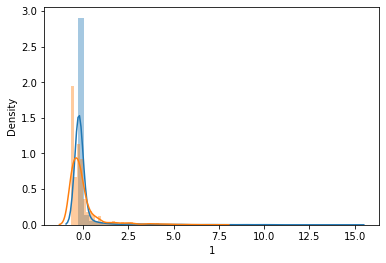

In [85]:
import seaborn as sns

#sns.distplot(comment_cnt['youtube'])
sns.distplot(pd.DataFrame(z_score)[0])
sns.distplot(pd.DataFrame(z_score)[1])

In [86]:
pd.DataFrame(z_score)[1]

0      -0.639112
1      -0.247703
2       0.437262
3      -0.051999
4       0.828671
          ...   
1858   -0.247703
1859    5.623432
1860   -0.443408
1861   -0.149851
1862   -0.639112
Name: 1, Length: 1863, dtype: float64

In [87]:
comment_cnt['youtube_norm'] = list(pd.DataFrame(z_score)[0])
comment_cnt['naver_norm'] = list(pd.DataFrame(z_score)[1])

In [88]:
np.log(comment_cnt['naver_norm'] + 2)
np.log(comment_cnt['youtube_norm'] + 2)

vid
-2KbmcbYaZg    0.546780
-9w1W5DiNt0    0.561096
-Ak_rXYhAoA    0.546780
-C_TMXKuJq0    0.556346
-DIiXJV80zo    0.545979
                 ...   
znrGagwWfu0    0.567393
zpe7BgZPirk    1.284803
zqMimKl5nv8    0.556346
zsUKBGA3_A0    0.556346
zvt1r_xX65Q    0.564249
Name: youtube_norm, Length: 1863, dtype: float64

/home/mglee/anaconda3/envs/save/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mglee/anaconda3/envs/save/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mglee/anaconda3/envs/save/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mglee/anaconda3/envs/save/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

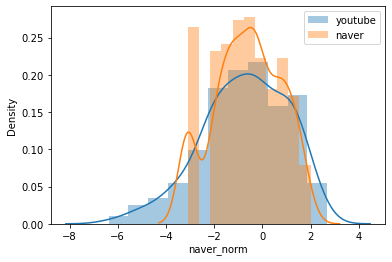

In [89]:
import numpy as np
import matplotlib.pyplot as plt

sns.distplot(np.log(comment_cnt['youtube_norm']), label = 'youtube')
sns.distplot(np.log(comment_cnt['naver_norm']), label = 'naver')
plt.legend()

In [90]:
comment_cnt['youtube_norm']

vid
-2KbmcbYaZg   -0.272319
-9w1W5DiNt0   -0.247409
-Ak_rXYhAoA   -0.272319
-C_TMXKuJq0   -0.255712
-DIiXJV80zo   -0.273703
                 ...   
znrGagwWfu0   -0.236337
zpe7BgZPirk    1.613955
zqMimKl5nv8   -0.255712
zsUKBGA3_A0   -0.255712
zvt1r_xX65Q   -0.241873
Name: youtube_norm, Length: 1863, dtype: float64

In [91]:
comment_cnt['log_youtube'] = np.log(comment_cnt['youtube_norm'] + 2)
comment_cnt['log_naver'] = np.log(comment_cnt['naver_norm'] + 2)

In [92]:
comment_cnt = comment_cnt.reset_index()

In [53]:
comment_cnt.loc[comment_cnt['log_youtube'] < 0.00001, 'log_youtube'] = 0.000001
comment_cnt.loc[comment_cnt['log_naver'] < 0.00001, 'log_naver'] = 0.000001

In [93]:
comment_cnt

,vid,youtube,naver,youtube_norm,naver_norm,log_youtube,log_naver
0,-2KbmcbYaZg,2,1,-0.272319,-0.639112,0.546780,0.308137
1,-9w1W5DiNt0,20,5,-0.247409,-0.247703,0.561096,0.560927
2,-Ak_rXYhAoA,2,12,-0.272319,0.437262,0.546780,0.890875
3,-C_TMXKuJq0,14,7,-0.255712,-0.051999,0.556346,0.666804
4,-DIiXJV80zo,1,16,-0.273703,0.828671,0.545979,1.039807
...,...,...,...,...,...,...,...
1858,znrGagwWfu0,28,5,-0.236337,-0.247703,0.567393,0.560927
1859,zpe7BgZPirk,1365,65,1.613955,5.623432,1.284803,2.031227
1860,zqMimKl5nv8,14,3,-0.255712,-0.443408,0.556346,0.442499
1861,zsUKBGA3_A0,14,6,-0.255712,-0.149851,0.556346,0.615266


In [223]:
comment_cnt = comment_cnt.dropna()

In [224]:
comment_cnt.reset_index(drop = True, inplace = True)

In [94]:
comment_cnt['ratio'] = comment_cnt['naver'] / comment_cnt['youtube']
comment_cnt['log_ratio'] = comment_cnt['log_naver'] - comment_cnt['log_youtube']

In [99]:
comment_cnt['vtitle'] = comment_cnt['vid'].apply(lambda x: vid_dict[x])
comment_cnt['category'] = comment_cnt['vid'].apply(lambda x: category_dict[x])

In [102]:
comment_cnt.sort_values('log_ratio').head(15)

,vid,youtube,naver,youtube_norm,naver_norm,log_youtube,log_naver,ratio,log_ratio,category,vtitle
433,DVGFTDuJQyw,10919,5,14.835866,-0.247703,2.823512,0.560927,0.000458,-2.262584,사회,"등굣길 초등학생, 80대 남성 집 끌려가 성폭행"
1437,lGcg7-EWbl0,7147,5,9.615744,-0.247703,2.452361,0.560927,0.000700,-1.891434,사회,"14만 전체 경찰회의로 확대 추진…이상민 “부화뇌동, 위험”"
1020,WyVecNe8yEg,6664,6,8.947314,-0.149851,2.393094,0.615266,0.000900,-1.777828,경제,[ET] ‘아이 안 낳는’ 한·중·일…서양인들이 분석해낸 이유?
1466,mDsbMUnqZsw,5187,3,6.903273,-0.443408,2.186419,0.442499,0.000578,-1.743920,세계,후쿠시마원전 항만에 세슘 물고기…“원전 오염수 관리 불능”
118,39Luin3bgfM,4157,2,5.477842,-0.541260,2.011944,0.377573,0.000481,-1.634371,사회,[크랩] 시간을 돈으로 사는 수준이라는 지하철 신분당선
1805,y7G3c1boRbs,3689,2,4.830171,-0.541260,1.921350,0.377573,0.000542,-1.543777,사회,[친절한 뉴스K] 일회용품 금지 확대 석 달 앞으로…어떤 품목 안 될까?
690,MU3_ZbVy7L4,3210,1,4.167276,-0.639112,1.819257,0.308137,0.000312,-1.511120,사회,“이틀 만에 간까지 이동”…작을수록 오래 남아 악영향
1272,fFwkVjUoBpM,5420,8,7.225725,0.045853,2.221996,0.715815,0.001476,-1.506181,사회,세종시 20대 공무원 극단적 선택…“3명이 하던 일 혼자 도맡아”
761,ONmEmtDGDas,4296,5,5.670206,-0.247703,2.037344,0.560927,0.001164,-1.476416,사회,"“끝까지 싸우겠다”…법원 판결 이후, 이슬람 갈등 더욱 격화"
1393,jb90PCpAZ6g,5207,8,6.930952,0.045853,2.189523,0.715815,0.001536,-1.473708,사회,40인분 시켜놓고 ‘노쇼’… 상습 허위 주문 피해 속출


In [80]:
comment_cnt.sort_values('log_ratio', ascending=False).head(15)

,index,vid,youtube,naver,youtube_norm,naver_norm,log_youtube,log_naver,ratio,log_ratio,vtitle,category
717,“다시 문 닫을 수도 없고”…태국 등 동남아 코로나 재확산 우려,N1WNCR4lNJw,154,83,-0.061964,7.384772,0.661675,2.239088,0.538961,1.577413,“다시 문 닫을 수도 없고”…태국 등 동남아 코로나 재확산 우려 / KBS 202...,세계
1698,日 입국 전 PCR 검사 면제…OECD 회원국 중 한국만 남아,uGlxlwt2LoE,52,71,-0.203123,6.210545,0.586050,2.105419,1.365385,1.519369,일본 입국 전 PCR 검사 면제…OECD 회원국 중 한국만 남아 / KBS 202...,세계
805,日 입국 전 PCR 검사 면제…OECD 회원국 중 한국만 남아,PazhdmqGggw,78,71,-0.167142,6.210545,0.605877,2.105419,0.910256,1.499543,"일본, 입국 전 PCR 검사 면제…OECD 회원국 중 한국만 남아 / KBS 20...",세계
1334,"[단독] 검찰, ‘수억 대 정치자금 수수’ 야당 정치인 압수수색",hl-HirpnKOY,31,65,-0.232186,5.623432,0.569744,2.031227,2.096774,1.461483,"[단독] 검찰, ‘수억 대 정치자금 수수’ 야당 정치인 압수수색 / KBS 202...",사회
162,[제보] “콜센터 직원은 휴대전화 금지”…금융회사 ‘핸골당’ 논란,4wuO8OqsuHI,41,65,-0.218346,5.623432,0.577542,2.031227,1.585366,1.453685,[제보] “콜센터 직원은 휴대전화 금지”…금융회사 ‘핸골당’ 논란 / KBS 20...,사회
1749,김혜경 씨 수행비서 구속영장 기각…도청 공무원들로 수사 확대,vgZseC3gFkM,61,63,-0.190668,5.427727,0.592958,2.005220,1.032787,1.412262,김혜경 씨 수행비서 구속영장 기각…도청 공무원들로 수사 확대 / KBS 2022....,사회
1850,[단독] 악마 ‘엘’이 찍은 성착취물…‘일베’에서만 4만 번 조회,zXKFYZcmO_E,302,76,0.142855,6.699806,0.762139,2.163301,0.251656,1.401162,[단독] 악마 ‘엘’이 찍은 성착취물…‘일베’에서만 4만 번 조회 / KBS 20...,사회
1462,수학여행 다녀온 고교생 등 150여 명 코로나19 확진…일정 강행 논란,m5eQzj9Zeiw,9,59,-0.262632,5.036318,0.552372,1.951085,6.555556,1.398714,수학여행 다녀온 고교생 등 150여 명 코로나19 확진 / KBS 2022.07.20.,사회
610,[단독] 반지하 참사 ‘통한의 151분’…첫 신고 뒤 무슨 일 있었나?,Jv3kqYkC24A,19,59,-0.248792,5.036318,0.560306,1.951085,3.105263,1.390779,[단독] 반지하 참사 ‘통한의 151분’…첫 신고 뒤 무슨 일 있었나? / KBS ...,사회
1042,“납치돼 눈 떠보니 남한”…66년 만에 드러난 진실,YKFRYCE3sEw,26,55,-0.239105,4.644909,0.565822,1.893851,2.115385,1.328029,“납치돼 눈 떠보니 남한”…66년 만에 드러난 진실 / KBS 2022.08.11.,사회


In [81]:
comment_cnt.loc[abs(comment_cnt.log_ratio).sort_values().index,:].head(15)

,index,vid,youtube,naver,youtube_norm,naver_norm,log_youtube,log_naver,ratio,log_ratio,vtitle,category
348,예상보다 이른 정점?…“변이 바이러스가 변수”,AXXYgCW6zOM,20,5,-0.247409,-0.247703,0.561096,0.560927,0.250000,-0.000168,예상보다 이른 정점?…“변이 바이러스가 변수” / KBS 2022.08.03.,사회
1,"‘제로 코로나’ 홍콩, 신규 확진 천여 명…미용실·종교시설 폐쇄, 채소대란 우려",-9w1W5DiNt0,20,5,-0.247409,-0.247703,0.561096,0.560927,0.250000,-0.000168,"‘제로 코로나’ 홍콩, 신규 확진 천여 명…미용실·종교시설 폐쇄, 채소대란 우려 /...",세계
548,北 신의주 봉쇄 해제 확인…“신규 발열 0명”,HZ4DEaubqnM,20,5,-0.247409,-0.247703,0.561096,0.560927,0.250000,-0.000168,북한 신의주 봉쇄 해제 확인…“신규 발열 0명” / KBS 2022.07.30.,세계
1714,‘한국산 전기차 해법’ 협의 시작…“정밀한 공략으로 교섭”,uxDfjdeQbfc,20,5,-0.247409,-0.247703,0.561096,0.560927,0.250000,-0.000168,‘한국산 전기차 해법’ 협의 시작…“정밀한 공략으로 교섭” / KBS 2022.0...,세계
1324,"쌍용차 회생 급물살…법원, ‘회생계획안’ 인가",hYexhnozTxM,20,5,-0.247409,-0.247703,0.561096,0.560927,0.250000,-0.000168,"쌍용차 회생 급물살…법원, ‘회생계획안’ 인가 / KBS 2022.08.27.",경제
318,가계부채 뇌관 ‘2030’과 ‘소상공인’ 만나보니…,9ldmXHnsFGs,90,6,-0.150535,-0.149851,0.614897,0.615266,0.066667,0.000370,가계부채 뇌관 ‘2030’과 ‘소상공인’ 만나보니… / KBS 2022.05.11.,경제
274,"[문화광장] 가상인간, 가수·배우로 연예계 본격 진출",809LGrS9kZ4,19,5,-0.248792,-0.247703,0.560306,0.560927,0.263158,0.000622,"가상인간, 가수·배우로 연예계 본격 진출 / KBS 2022.02.15.",생활
657,근조화환·법적 대응·모금…“경찰 반발 계속”,LLXrt5GzzTA,21,5,-0.246025,-0.247703,0.561885,0.560927,0.238095,-0.000958,근조화환·법적 대응·모금…“경찰 반발 계속” / KBS 2022.07.26.,사회
1555,주말에도 확진자 4만 명대…내일부터 백신 4차 접종 예약,pQD0R5_FEhc,21,5,-0.246025,-0.247703,0.561885,0.560927,0.238095,-0.000958,주말에도 확진자 4만 명대…내일(18일)부터 백신 4차 접종 예약 / KBS 20...,사회
870,대구 주택가서 ‘새총 구슬’ 쏜 40대 검거,SIU34NMrmbg,21,5,-0.246025,-0.247703,0.561885,0.560927,0.238095,-0.000958,대구 주택가서 ‘새총 구슬’ 쏜 40대 검거 / KBS 2022.07.27.,사회


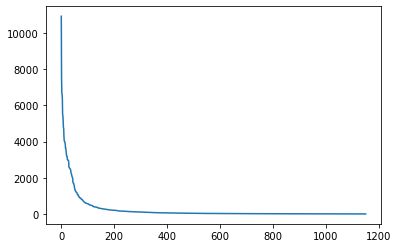

In [115]:
import matplotlib.pyplot as plt

plt.plot(youtube_filtered.groupby('vtitle').size().sort_values(ascending=False).values)

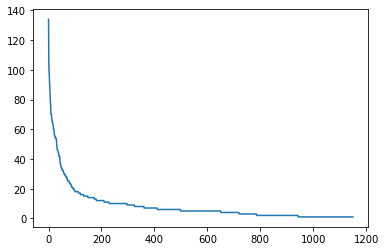

In [116]:
plt.plot(naver_filtered.groupby('vtitle').size().sort_values(ascending=False).values)

In [143]:
for item in youtube_filtered['ctime']:
    print(item[:10])
    
    break

2022-01-03


In [147]:
naver_filtered['cymd'] = naver_filtered['ctime'].apply(lambda x: x[:4] + '-' + x[5:7] + '-' + x[8:10])

In [169]:
def nan_pass(x):
    if type('str') == type(x):
        return x[:10]
    else:
        return '9999-99-99'

In [171]:
youtube_filtered['cymd'] = youtube_filtered['ctime'].apply(lambda x : nan_pass(x))
naver_filtered['cymd'] = naver_filtered['ctime'].apply(lambda x : x[:10])

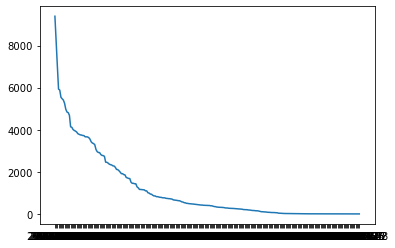

In [174]:
plt.plot(youtube_filtered.groupby('cymd').size().sort_values(ascending=False))

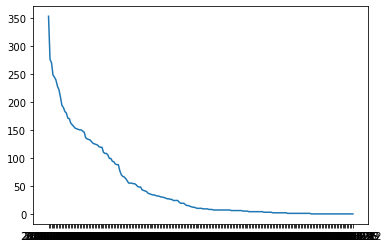

In [175]:
plt.plot(naver_filtered.groupby('cymd').size().sort_values(ascending=False))

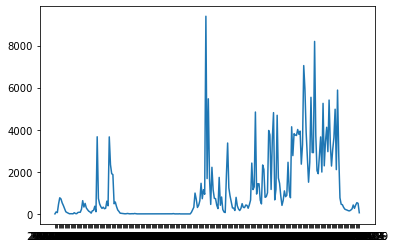

In [177]:
plt.plot(youtube_filtered.groupby('cymd').size())

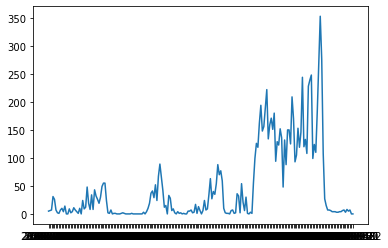

In [178]:
plt.plot(naver_filtered.groupby('cymd').size())